# Seaborn(sns)官方文档学习笔记（第四章 线性关系的可视化）

这章介绍的针对回归类型的散点数据的可视化可能是未来机器学习最直接的助理，这章给我的感悟很多。

许多数据集包含多个定量变量，分析的目的通常是将这些变量相互关联起来。 我们以前讨论过可以通过显示两个变量的联合分布来实现的功能。 然而，使用统计模型来估计两个噪声观测组之间的简单关系可能是非常有帮助的。 本章讨论的功能将通过线性回归的通用框架进行。

在Tukey的精神中，Seaborn的回归图主要是为了添加一个视觉指南，有助于在探索性数据分析期间强调数据集中的模式。 也就是说，Seaborn本身并不是统计分析的一揽子计划。 要获得与回归模型拟合相关的量化措施，您应该使用[statsmodels](http://www.statsmodels.org/stable/index.html)。 然而，Seaborn的目标是通过可视化快速，轻松地探索数据集，使之变得与通过统计表格来探索数据集一样重要（如果不是更重要的话）。

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

np.random.seed(sum(map(ord, "regression")))

tips = sns.load_dataset("tips")

## 绘制线性回归模型的函数

使用Seaborn中的两个主要功能可视化通过回归确定的线性关系。这些函数regplot()和lmplot()是密切相关的，并且共享了大部分的核心功能。然而，了解他们不同的方式很重要，以便您可以快速为特定工作选择正确的工具。

在最简单的调用中，两个函数绘制了两个变量x和y的散点图，然后拟合回归模型y〜x并绘制了该回归线的结果回归线和95％置信区间：

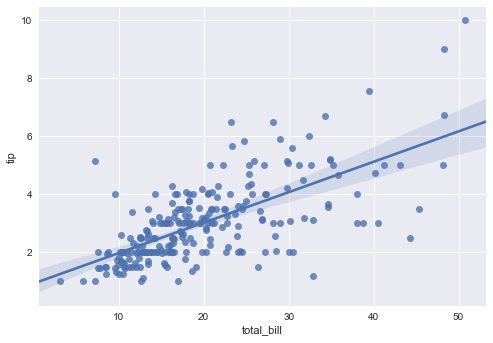

In [2]:
sns.regplot(x="total_bill", y="tip", data=tips);

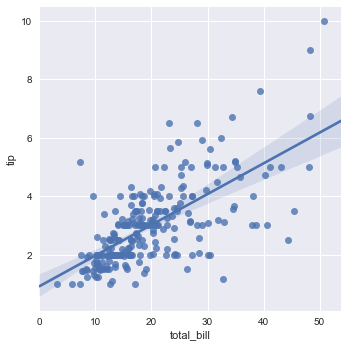

In [3]:
sns.lmplot(x="total_bill", y="tip", data=tips);

很显然，所得到的的图的结果是相同的，除了图形形状略有些不同，这里会简短的解释。

目前，要知道的另一个主要区别是regplot()以各种格式接受x和y变量，包括numpy数组、Pandas的Series列或DataFrame对象的变量引用；不一样的是，lmplot()将数据集作为一个必需的参数，而x和y变量必须指定为字符串。这种数据格式称为“长格式”或“整洁”数据。除了这种输入灵活性，regplot()可以看做是拥有lmplot()特征的子集，所以后面将使用后者进行演示。

备注：

> 这里官方的例子实际上并不好，比较容易的理解方式是：上面的结果可以在regplot()函数中通过只传入x和y绘出：sns.regplot(x=tips["total_bill"],y=tips["tip"])；而相应的sns.lmplot(x=tips["total_bill"], y=tips["tip"])这种写法就会报错，因为数据集data是lmplot()的必传参数。

当其中一个变量取值为离散型的时候，可以拟合一个线性回归。然而，这种数据集生成的简单散点图通常不是最优的：

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


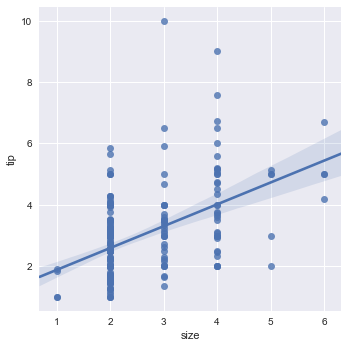

In [6]:
sns.lmplot(data=tips,x="size",y="tip")

一个常用的方法是为离散值添加一些随机噪声的“抖动”(jitter)，使得这些值的分布更加明晰。

值得注意的是，抖动仅适用于散点图数据，且不会影响拟合的回归线本身

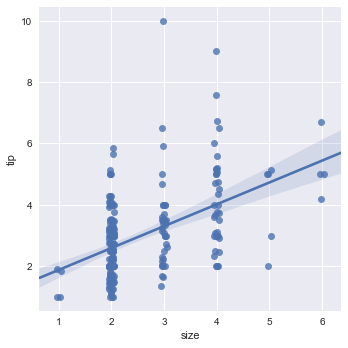

In [7]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05);

另一种选择是在每个独立的数据分组中对观察结果进行折叠，以绘制中心趋势的估计以及置信区间：

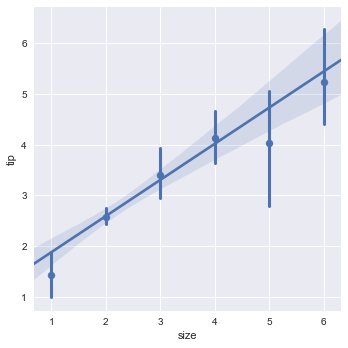

In [8]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

## 不同类型的模型拟合

上面使用的简单线性回归模型非常简单，但是，它不适用于某些种类的数据集。 [Anscombe&#x27;s quartet](http://link.zhihu.com/?target=https%3A//en.wikipedia.org/wiki/Anscombe%2527s_quartet)数据集显示了一些简单线性回归提供了简单目视检查清楚显示差异的关系估计的例子。 例如，在第一种情况下，线性回归是一个很好的模型：

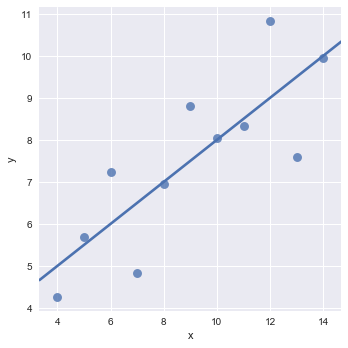

In [9]:
anscombe = sns.load_dataset("anscombe")
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

第二个数据集中的线性关系是一样的，但是基本清楚地表明这不是一个好的模型：

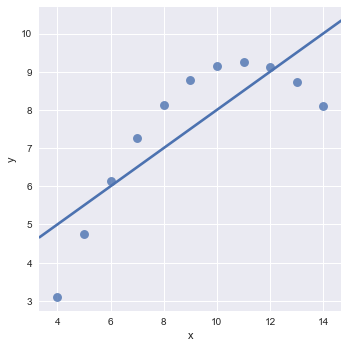

In [10]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

除了正在研究的主要关系之外，“异常值”观察还有一个不同的问题，它们由于某种原因而偏离了主要关系：

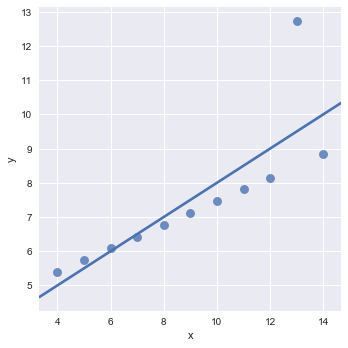

In [11]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});

在有异常值的情况下，它可以使用不同的损失函数来减小相对较大的残差，拟合一个健壮的回归模型，传入robust=True：

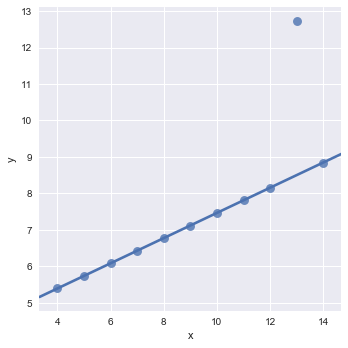

In [12]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

当y变量是二进制时，简单的线性回归也“工作”了，但提供了不可信的预测结果：

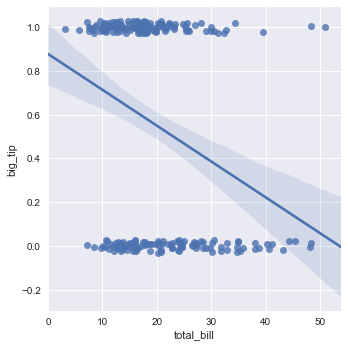

In [13]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03);

在这种情况下，解决方案是拟合逻辑(Logistic)回归，使得回归线显示给定值x的y=1的估计概率：

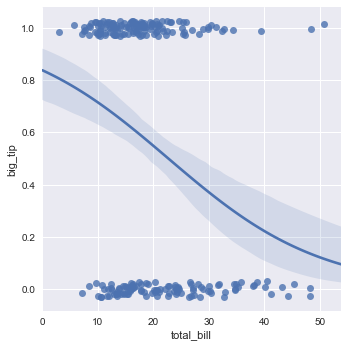

In [14]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

请注意，逻辑回归估计比简单回归计算密集程度（Robust回归也是如此），并且由于使用引导程序计算回归线周围的置信区间，您可能希望将其关闭获得更快的迭代速度（使用参数ci=None）。

一个完全不同的方法是使用一个[lowess smoother](https://en.wikipedia.org/wiki/Local_regression)拟合非参数回归。 这种方法具有最少的假设，尽管它是计算密集型的，因此目前根本不计算置信区间：

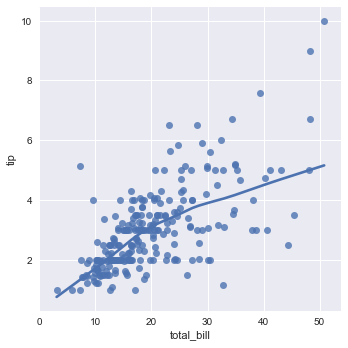

In [15]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True);

residplot()是一个有用的工具，用于检查简单的回归模型是否拟合数据集。它拟合并移除一个简单的线性回归，然后绘制每个观察值的残差值。 理想情况下，这些值应随机散布在y = 0附近：

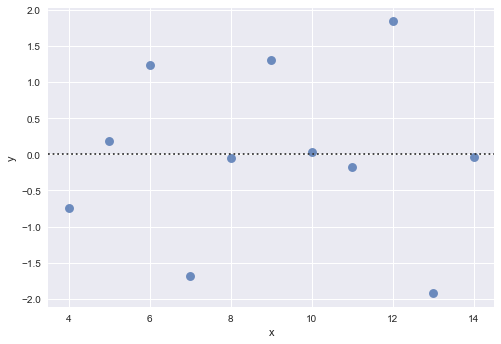

In [16]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});

如果残差中有结构，则表明简单的线性回归是不合适的：

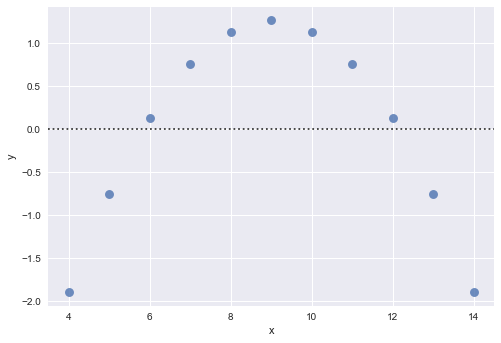

In [17]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80});

## 调节其他变量

上面的图表显示了许多方法来探索一对变量之间的关系。然而，通常，一个更有趣的问题是“这两个变量之间的关系如何作为第三个变量的函数而变化？”这是regplot()和lmplot()之间的区别。 虽然regplot()总是显示单个关系，lmplot()将regplot()与FacetGrid结合在一起，提供了一个简单的界面，可以在“faceted”图上显示线性回归，从而允许您探索与多达三个其他类别变量的交互。

分类关系的最佳方式是绘制相同轴上的两个级别，并使用颜色来区分它们：

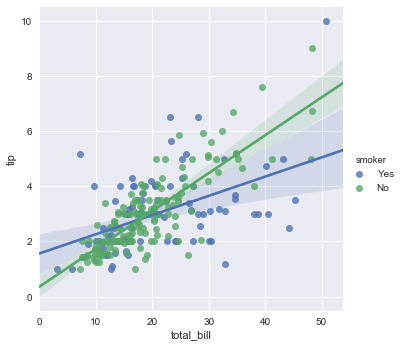

In [18]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

除了颜色之外，还可以使用不同的散点图标记来使黑色和白色的图像更好地绘制。 您还可以完全控制所用的颜色：

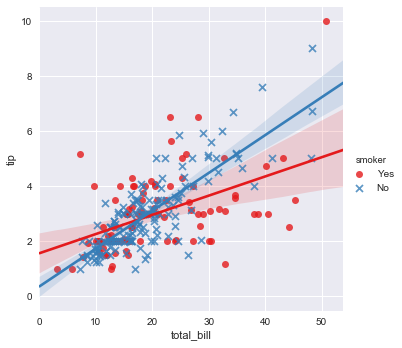

In [19]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

要添加另一个变量，您可以绘制多个“facet”，每个级别的变量出现在网格的行或列中：

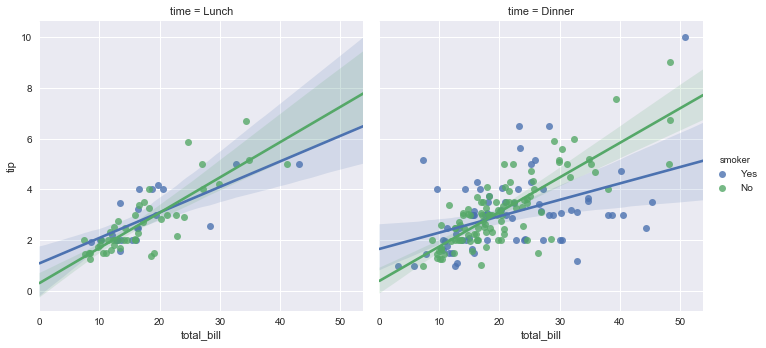

In [20]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

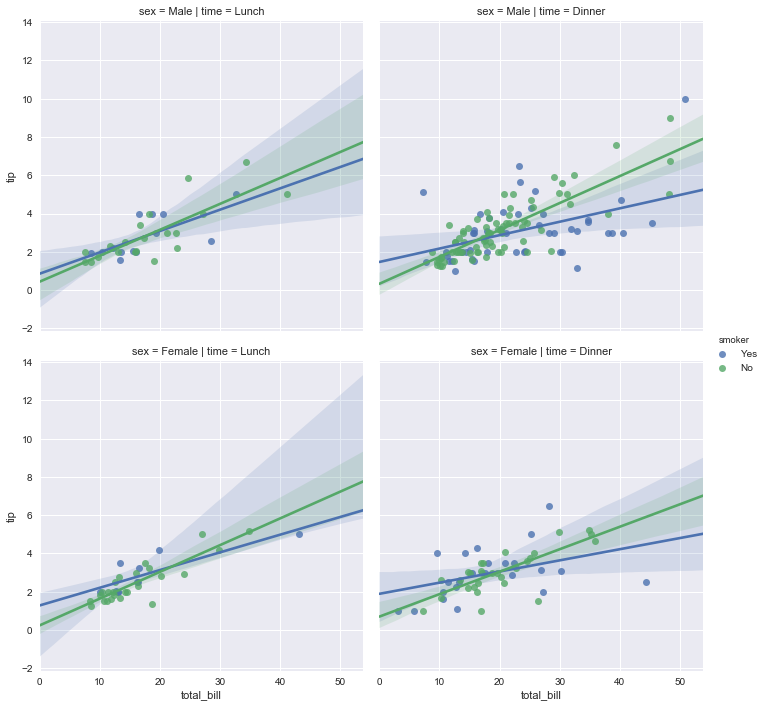

In [21]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips);

## 控制绘制的大小和形状

在我们注意到由regplot()和lmplot()创建的默认绘图看起来是一样的，但在轴上却具有不同大小和形状。 这是因为func：regplot是一个“轴级”功能绘制到特定的轴上。 这意味着您可以自己制作多面板图形，并精确控制回归图的位置。 如果没有提供轴，它只需使用“当前活动的”轴，这就是为什么默认绘图与大多数其他matplotlib函数具有相同的大小和形状的原因。要控制大小，您需要自己创建一个图形对象。

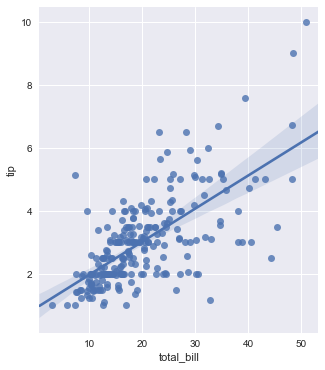

In [22]:
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax);

相反，lmplot()图的大小和形状通过FacetGrid界面使用size和aspect参数进行控制，这些参数适用于每个图中的设置，而不是整体图形：

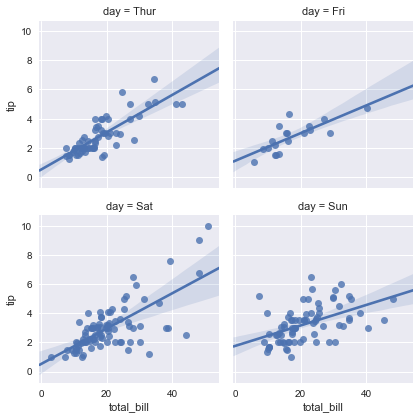

In [23]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=2, size=3);

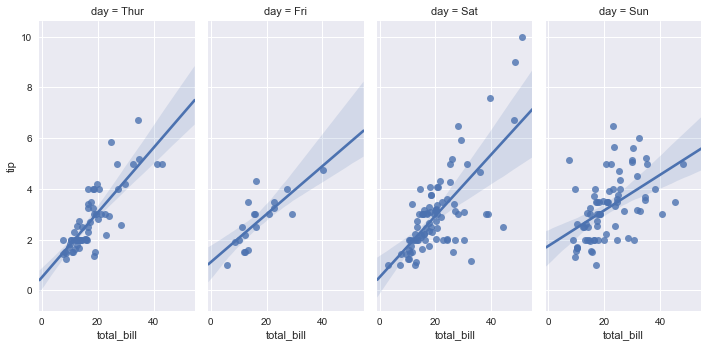

In [24]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           aspect=.5);

## 在其他背景下绘制回归

另外一些Seaborn函数在更大，更复杂的绘制中使用regplot()。 第一个是在上一章分布介绍的jointplot()函数。 除了前面讨论的绘图样式之外，jointplot()可以使用regplot()通过传递kind ="reg"来显示关节轴上的线性回归拟合：

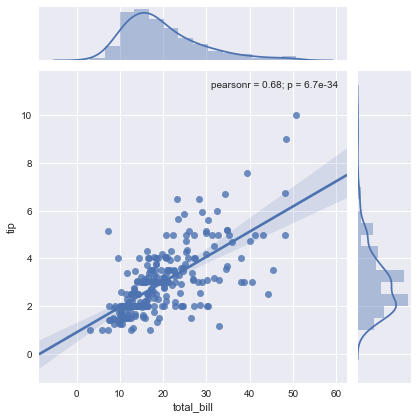

In [25]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

使用kind="reg"的pairplot()函数结合了regplot()和PairGrid来显示数据集中变量之间的线性关系。 注意这是不同于lmplot()的。 在下图中，两轴在第三个变量的两个级别上不显示相同的关系; 相反，PairGrid()用于显示数据集中变量的不同配对之间的多个关系：

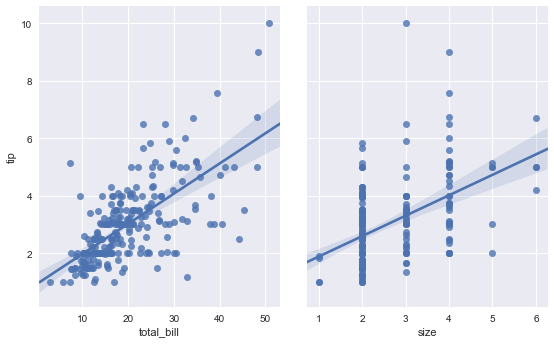

In [26]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             size=5, aspect=.8, kind="reg");

类似lmplot()，但不同于jointplot()，使用hue参数在pairplot()中内置了一个附加分类变量的条件：

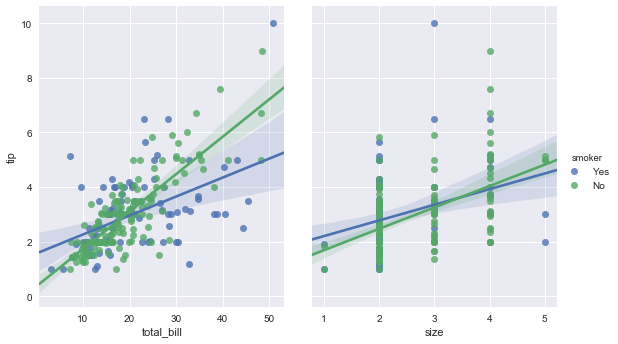

In [28]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", size=5, aspect=.8, kind="reg");

**【第四章完】**